# the naive bayes algorithm
calculeaza probabilitatea  emailul de a fi spam si calculeaza probabilitatea  emailului de a nu fi spam , algoritmul va lua ca raspuns probabilitatea cea mai mare dintre cele 2.
pe axa probabilitati Not Spam (x) si probabilitatea spam(y) im mijloc este tras o linie din 0 inpartind in jumate cele doua puncte(x,y) aceasta poarta numele de Decision Boundary

# Probalitatii
# 1) Calcularea probabilitati
## P(spam) = 55%
## $\frac{Nr Spam Emails}{Total Nr. emails} = \frac{148bn}{269bn}$

# 2) Join Probalitatii
     arungi o moneda de doua ori, care este probalilitatea de a cadea a cap de ambele 2 ori
# $P (Cap \cap Cap) $ = P(cap) x P(cap) = 50 % x 50 % = 25% 
# probabilitatea lui a si b
# $  P(A \cap B) = P(A) * P(B)$
#Challenge 
# $P(6 \cap 6 \cap6 )$ = 16,66% x 16,66% x 16,66% = 0.46%

# 3) Probabilitate condițională
probabilitatea lui A dand B => P(A | B)
# P(Ploaie | Norii) = $\frac{P(Ploaie\cap Norii)}{P(Norii)} = \frac{105/365}{250/365}$ = $\frac{zilele\ care\ ploua\ si\ zilele\ cu\ nori\ dintr-un\ an}{zilele\ cu\ norii\ dintr-un\ an}$ = 42 % sa sansa de a ploua
# P(A | B) = $\frac{P(A\cap B)}{P(B)}$

# 4) Teoria lui Bayes 
# P(Ploaie | Norii) = $\frac{P(Norii\ |\ Ploaie)P(Ploaie)}{P(Norii)}$
# P(A | B) = $\frac{P(B\ |\ A)P(A)}{P(B)}$
# P(Spam | Viagra) = $\frac{P(65/350000) * 0.55}{P(75/700000)}= $ 90%
# P(Spam | Viagra) = $\frac{P(de\ cate\ ori\ apare\ cuvantul\ viagra\ in\ emailurile\ cu\ spam\ |\ nr\ total\ de\ cuvinte\ in\ email\ cu\ spam)P(Spam)}{P(nr\ total\ al\ cuvantului\  viagra\ mentionat\ in\ toate\ emailurile\ fie\ ele\ spam\ sau\ nonspam  |\ nr\ total\ de\ cuvine\ in\ toate\  e-mailuri\ fie\ ele\ spam\ sau\ nonspam)}$

# $ P(Spam\ |\ Viagra)\ \cap\ P(Spam\ |\ Free )$

# P(Spam | Viagra) x P(Spam | Free )
Casa aflam daca e-mailu este spam sau nu vom inmultim fiecare probabilitate a fiecarui cuvant pana cand aflam probabilitate totala a emailul find spam si atunci vom comparam daca emailul cu propabilitatea  ca acesta sa nu fie  spam  . daca emailul contine foarte multe cuvinte cu spam atunci acest email este spam.
Ex:
# "Hello friend, want free viagra?"
# Calculam probalilitate ca emailu sa fie spam
# P(Spam | Hello) * P(Spam | Want) * P(Spam| Free) * (Spam | Viagra)
#Adica vom verifica probabilitatea ca hello sa fie in emailurile normale, probabilitatea ca Want sa fie in emailurile normale, probabilitatea ca Free sa fie in emailurile normale, probabilitatea ca Viagra sa fie in emailurile normale

# Importurii

In [1]:
from os import walk
from os.path import join

import pandas as pd
import matplotlib.pyplot as plt

import nltk
from nltk.stem import PorterStemmer
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

from bs4 import BeautifulSoup
from wordcloud import WordCloud
from PIL import Image
import numpy as np

from sklearn.model_selection import train_test_split

# Constants

In [136]:
 EXAMPLE_FILE = 'SpamData/01_Processing/practice_email.txt'

 SPAM_1_PATH = 'SpamData/01_Processing/spam_assassin_corpus/spam_1'
 SPAM_2_PATH = 'SpamData/01_Processing/spam_assassin_corpus/spam_2'
 EASY_NONSPAM_1_PATH = 'SpamData/01_Processing/spam_assassin_corpus/easy_ham_1'
 EASY_NONSPAM_2_PATH = 'SpamData/01_Processing/spam_assassin_corpus/easy_ham_2'
 
SPAM_CAT =1
HAM_CAT =0
VOCAB_SIZE = 2500 #gmail sou hotmail folosec undeva la 10000-15000 de cuvinte 

DATA_JSON_FILE = 'SpamData/01_Processing/email-text-data.json'
WORD_ID_FILE = 'SpamData/01_Processing/word-by-id.csv'

TRAINING_DATA_FILE = 'SpamData/02_Training/train-data.txt'
TEST_DATA_FILE = 'SpamData/02_Training/test-data.txt'

WHALE_FILE = 'SpamData/01_Processing/wordcloud_resources/whale-icon.png'
SKULL_FILE = 'SpamData/01_Processing/wordcloud_resources/skull-icon.png'
THUMBS_UP_FILE = 'SpamData/01_Processing/wordcloud_resources/thumbs-up.png'
THUMBS_DOWN_FILE = 'SpamData/01_Processing/wordcloud_resources/thumbs-down.png'

CUSTOM_FONT_FILE = 'SpamData/01_Processing/wordcloud_resources/OpenSansCondensed-Bold.ttf'

# Reading files

In [3]:
#Encoding = cum computerul se ocupa cu literele si text, fiecare litera si text trebui transformata in 1 si 0
stream = open(EXAMPLE_FILE, encoding='latin-1')
message = stream.read()
stream.close()

print(type(message))
print(message)

<class 'str'>
From exmh-workers-admin@redhat.com  Thu Aug 22 12:36:23 2002
Return-Path: <exmh-workers-admin@spamassassin.taint.org>
Delivered-To: zzzz@localhost.netnoteinc.com
Received: from localhost (localhost [127.0.0.1])
	by phobos.labs.netnoteinc.com (Postfix) with ESMTP id D03E543C36
	for <zzzz@localhost>; Thu, 22 Aug 2002 07:36:16 -0400 (EDT)
Received: from phobos [127.0.0.1]
	by localhost with IMAP (fetchmail-5.9.0)
	for zzzz@localhost (single-drop); Thu, 22 Aug 2002 12:36:16 +0100 (IST)
Received: from listman.spamassassin.taint.org (listman.spamassassin.taint.org [66.187.233.211]) by
    dogma.slashnull.org (8.11.6/8.11.6) with ESMTP id g7MBYrZ04811 for
    <zzzz-exmh@spamassassin.taint.org>; Thu, 22 Aug 2002 12:34:53 +0100
Received: from listman.spamassassin.taint.org (localhost.localdomain [127.0.0.1]) by
    listman.redhat.com (Postfix) with ESMTP id 8386540858; Thu, 22 Aug 2002
    07:35:02 -0400 (EDT)
Delivered-To: exmh-workers@listman.spamassassin.taint.org
Received: fro

In [4]:
sys.getfilesystemencoding()

'utf-8'

# Extrage textul din bady email

In [5]:
stream = open(EXAMPLE_FILE, encoding='latin-1')

is_body = False #crearea unei variabile boolean
lines = []

for line in stream:
    if is_body:             #verifica daca suntem in interiorul body
        lines.append(line)  #va loua lista lines si va aduga o singura line din text catre lista noastra
    elif line == '\n':      #ca sa vedem daca sunt in interiorul body verificam dupa acel rand liber intre ele
        is_body= True


stream.close()

#print email body
#print(lines)# acesta arata cum este dupa extragerea cu loop

#ceva care poate fi citit mai bine
email_body = '\n'.join(lines)
print(email_body)



Dear Mr Still



Good tidings to you and all your staff for the festive season ahead (Christmas).

Now to the crux of the matter-in-hand: I am a fully qualified Santa Claus and am wondering whether you might consider me to run my own "Santa's Grotto" in your store.

But WAIT! You're probably thinking: "What makes him so special?"

Well, first of all, I have made several changes to the characterisation of Father Christmas. Rather than greeting the children with shouts of "Ho, ho, ho!" I prefer to whisper the phrase "Dependence is not unfathomable in this cruel world we live in". In addition, my gifts are ALL hand-made, ranging from felt hoops to vanilla-pod holders.

You will note also, from the enclosed sketch, that I have radically redesigned Santa's outfit and have renamed my character "Lord Buckles". Would you be interested in employing me? I promise NEVER to let you down.

I look forward to hearing from you.



Best wishes

Robin Cooper

[Excerpt from the book: The Timewaster Let

# Generator Functions

In [6]:
def generate_squares(N):
    for my_number in range(N):
        yield my_number **2 # yield iese din functie dar memoreaza starea din care a iesit

In [7]:
for i in generate_squares(5):
    print(i, end=' ->')

0 ->1 ->4 ->9 ->16 ->

# Extrage Body Email

In [8]:
def email_body_generator(path):

    for root, dirnames, filenames in walk(path):#functia walk genereaza file names in direcor prin tranversarea arborelui de sus in jos si yield un tuple adica 3 lucruri constante  #root=calea directorul, dirname=numele directorului, filenames= numele fisierului
        for file_name in filenames:

            filepath = join(root, file_name)#combina  calea din director cu numel fisierului pe care il iteram in loop

            stream = open(filepath, encoding='latin-1')

            is_body = False #crearea unei variabile boolean
            lines = []

            for line in stream:
                if is_body:             #verifica daca suntem in interiorul body
                    lines.append(line)  #va loua lista lines si va aduga o singura line din text catre lista noastra
                elif line == '\n':      #ca sa vedem daca sunt in interiorul body verificam dupa acel rand liber intre ele
                    is_body= True


            stream.close()

            #print email body
            #print(lines)# acesta arata cum este dupa extragerea cu loop

            #ceva care poate fi citit mai bine
            email_body = '\n'.join(lines)
            
            yield file_name, email_body 


In [9]:
def df_from_directory(path, classificator):
    rows = []
    row_names = []

    for file_name, email_body in email_body_generator(path):#de fiecare data cand va rula ne va da file_name si email_body
        rows.append({'MESSAGE' : email_body, 'CATEGORY' : classificator})#va stoca in aceasta lista 
        row_names.append(file_name)

    return pd.DataFrame(rows, index = row_names)

In [10]:
spam_emails = df_from_directory(SPAM_1_PATH, 1)
spam_emails = spam_emails.append(df_from_directory(SPAM_2_PATH, 1))
spam_emails.head()

,MESSAGE,CATEGORY
00001.7848dde101aa985090474a91ec93fcf0,"<!DOCTYPE HTML PUBLIC ""-//W3C//DTD HTML 4.0 Tr...",1
00002.d94f1b97e48ed3b553b3508d116e6a09,1) Fight The Risk of Cancer!\n\nhttp://www.adc...,1
00003.2ee33bc6eacdb11f38d052c44819ba6c,1) Fight The Risk of Cancer!\n\nhttp://www.adc...,1
00004.eac8de8d759b7e74154f142194282724,##############################################...,1
00005.57696a39d7d84318ce497886896bf90d,I thought you might like these:\n\n1) Slim Dow...,1


In [11]:
spam_emails.shape

(1898, 2)

In [12]:
#Challenge: Creaza un dataframe care contine emailurile fara spam. print shape pentru dataframe
ham_emails = df_from_directory(EASY_NONSPAM_1_PATH, HAM_CAT)
ham_emails = ham_emails.append(df_from_directory(EASY_NONSPAM_2_PATH, HAM_CAT))
ham_emails.head()

,MESSAGE,CATEGORY
00001.7c53336b37003a9286aba55d2945844c,"Date: Wed, 21 Aug 2002 10:54:46 -05...",0
00002.9c4069e25e1ef370c078db7ee85ff9ac,"Martin A posted:\n\nTassos Papadopoulos, the G...",0
00003.860e3c3cee1b42ead714c5c874fe25f7,Man Threatens Explosion In Moscow \n\n\n\nThur...,0
00004.864220c5b6930b209cc287c361c99af1,Klez: The Virus That Won't Die\n\n \n\nAlready...,0
00005.bf27cdeaf0b8c4647ecd61b1d09da613,"> in adding cream to spaghetti carbonara, whi...",0


In [13]:
ham_emails.shape

(3901, 2)

In [14]:
data = pd.concat((spam_emails, ham_emails))
print('Shape od entre dataframe is ', data.shape)
data.head()

Shape od entre dataframe is  (5799, 2)


,MESSAGE,CATEGORY
00001.7848dde101aa985090474a91ec93fcf0,"<!DOCTYPE HTML PUBLIC ""-//W3C//DTD HTML 4.0 Tr...",1
00002.d94f1b97e48ed3b553b3508d116e6a09,1) Fight The Risk of Cancer!\n\nhttp://www.adc...,1
00003.2ee33bc6eacdb11f38d052c44819ba6c,1) Fight The Risk of Cancer!\n\nhttp://www.adc...,1
00004.eac8de8d759b7e74154f142194282724,##############################################...,1
00005.57696a39d7d84318ce497886896bf90d,I thought you might like these:\n\n1) Slim Dow...,1


In [15]:
data.tail()

,MESSAGE,CATEGORY
01396.61983fbe6ec43f55fd44e30fce24ffa6,http://news.bbc.co.uk/1/hi/england/2515127.stm...,0
01397.9f9ef4c2a8dc012d80f2ce2d3473d3b7,"> >-- be careful when using this one.) Also, t...",0
01398.169b51731fe569f42169ae8f948ec676,">>>>> ""SM"" == Skip Montanaro <skip@pobox.com> ...",0
01399.ca6b00b7b341bbde9a9ea3dd6a7bf896,"So then, ""Mark Hammond"" <mhammond@skippinet.co...",0
01400.f897f0931e461e7b2e964d28e927c35e,"Hi there,\n\n\n\nNow this is probably of no us...",0


# Data Cleaning : Checking for Minssing Values

In [16]:
#verificam daca fiecare body mesaj este egal cu null 
#data['MESSAGE'] sau
data.MESSAGE.isnull().values.any() 

False

In [17]:
type("")

str

In [18]:
len('')

0

In [19]:
my_var = None # sau null

In [20]:
type(my_var)

NoneType

In [21]:
# verifica daca sunt emailuri goale (lungimea strigului este zero)
(data.MESSAGE.str.len() == 0).any()

True

In [22]:
(data.MESSAGE.str.len() == 0).sum()

3

In [23]:
# Challenge : Cum ati verifica numarul de intrari cu valoarea  null/None ?
data.MESSAGE.isnull().sum()

0

# Locate empty emails

In [24]:
type(data.MESSAGE.str.len() == 0)

pandas.core.series.Series

In [25]:
data[data.MESSAGE.str.len() == 0].index

Index(['cmds', 'cmds', 'cmds'], dtype='object')

In [26]:
data.index.get_loc(' ')

KeyError: ' '

# Remove System File Entries from Dataframe

In [27]:
data.drop(['cmds'], inplace=True)

In [28]:
data.shape

(5796, 2)

# Add Ducument IDs to Track Emails in Dataset

In [29]:
document_ids = range(0, len(data.index))
data['DOC_ID'] = document_ids

In [30]:
data.DOC_ID

00001.7848dde101aa985090474a91ec93fcf0       0
00002.d94f1b97e48ed3b553b3508d116e6a09       1
00003.2ee33bc6eacdb11f38d052c44819ba6c       2
00004.eac8de8d759b7e74154f142194282724       3
00005.57696a39d7d84318ce497886896bf90d       4
                                          ... 
01396.61983fbe6ec43f55fd44e30fce24ffa6    5791
01397.9f9ef4c2a8dc012d80f2ce2d3473d3b7    5792
01398.169b51731fe569f42169ae8f948ec676    5793
01399.ca6b00b7b341bbde9a9ea3dd6a7bf896    5794
01400.f897f0931e461e7b2e964d28e927c35e    5795
Name: DOC_ID, Length: 5796, dtype: int32

In [31]:
data['FILE_NAME'] = data.index
#data = data.set_index('DOC_ID')
data.set_index('DOC_ID', inplace = True)
data.head()

,MESSAGE,CATEGORY,FILE_NAME
DOC_ID,,,
0,"<!DOCTYPE HTML PUBLIC ""-//W3C//DTD HTML 4.0 Tr...",1,00001.7848dde101aa985090474a91ec93fcf0
1,1) Fight The Risk of Cancer!\n\nhttp://www.adc...,1,00002.d94f1b97e48ed3b553b3508d116e6a09
2,1) Fight The Risk of Cancer!\n\nhttp://www.adc...,1,00003.2ee33bc6eacdb11f38d052c44819ba6c
3,##############################################...,1,00004.eac8de8d759b7e74154f142194282724
4,I thought you might like these:\n\n1) Slim Dow...,1,00005.57696a39d7d84318ce497886896bf90d


In [32]:
data.tail()

,MESSAGE,CATEGORY,FILE_NAME
DOC_ID,,,
5791,http://news.bbc.co.uk/1/hi/england/2515127.stm...,0,01396.61983fbe6ec43f55fd44e30fce24ffa6
5792,"> >-- be careful when using this one.) Also, t...",0,01397.9f9ef4c2a8dc012d80f2ce2d3473d3b7
5793,">>>>> ""SM"" == Skip Montanaro <skip@pobox.com> ...",0,01398.169b51731fe569f42169ae8f948ec676
5794,"So then, ""Mark Hammond"" <mhammond@skippinet.co...",0,01399.ca6b00b7b341bbde9a9ea3dd6a7bf896
5795,"Hi there,\n\n\n\nNow this is probably of no us...",0,01400.f897f0931e461e7b2e964d28e927c35e


# Salveaza fisierul utilizand Pandas

In [33]:
data.to_json(DATA_JSON_FILE)

# Număr de mesaje spam vizualizate (Graficuri de piese)

In [34]:
data.CATEGORY.value_counts()

0    3900
1    1896
Name: CATEGORY, dtype: int64

In [35]:
amount_of_spam =  data.CATEGORY.value_counts()[1]
amount_of_ham = data.CATEGORY.value_counts()[0]

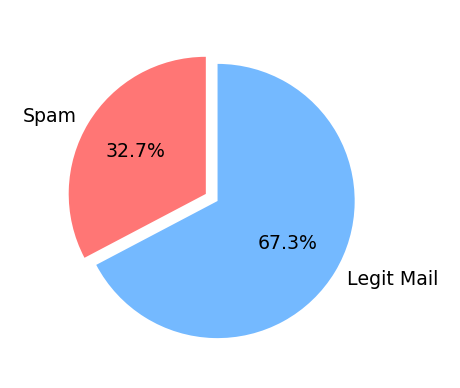

In [36]:
category_names = ['Spam', 'Legit Mail']
size = [amount_of_spam, amount_of_ham]
custom_colors = ['#ff7675', '#74b9ff']

plt.figure(figsize=(2,2), dpi=227)
plt.pie(size, labels=category_names, textprops={'fontsize' : 6}, startangle=90,#startangle= invarte in sensul inver acurilor de ceas afisajului categorile 
        autopct= '%1.1f%%', colors= custom_colors, explode=[0,0.1])# autopct= introduce in grafic procentul , explode= introduce acel spati pe care le desparte
plt.show()

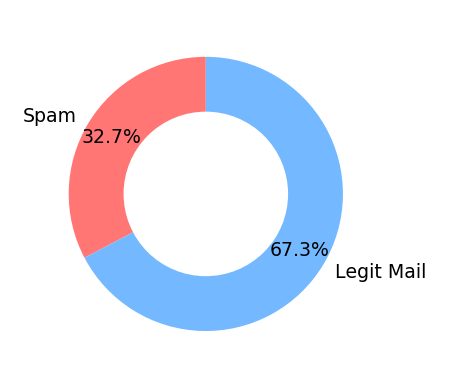

In [37]:
category_names = ['Spam', 'Legit Mail']
size = [amount_of_spam, amount_of_ham]
custom_colors = ['#ff7675', '#74b9ff']

plt.figure(figsize=(2,2), dpi=227)
plt.pie(size, labels=category_names, textprops={'fontsize' : 6}, startangle=90,#startangle= invarte in sensul inver acurilor de ceas afisajului categorile 
        autopct= '%1.1f%%', colors= custom_colors, pctdistance= 0.8 )# autopct= introduce in grafic procentul, pctdistance= aceasta controleaza unde ar trebui sa se afle procentul si anume la jumate

#deseneaza un cerc
centre_circle = plt.Circle((0,0), radius=0.6, fc='white')
plt.gca().add_artist(centre_circle) #plt.gca() dam unde ar tebui sa se afla cerlul pe axa

plt.show()

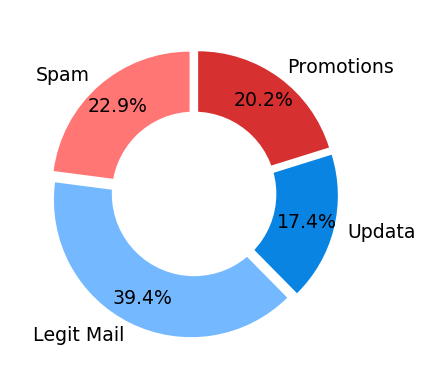

In [38]:
category_names = ['Spam', 'Legit Mail', 'Updata', 'Promotions']
size = [25, 43, 19, 22 ]
custom_colors = ['#ff7675', '#74b9ff','#0984e3','#d63031']
offset = [0.05, 0.05, 0.05, 0.05]

plt.figure(figsize=(2,2), dpi=227)
plt.pie(size, labels=category_names, textprops={'fontsize' : 6}, startangle=90,#startangle= invarte in sensul inver acurilor de ceas afisajului categorile 
        autopct= '%1.1f%%', colors= custom_colors, pctdistance= 0.8, explode=offset )# autopct= introduce in grafic procentul, pctdistance= aceasta controleaza unde ar trebui sa se afle procentul si anume la jumate

#deseneaza un cerc
centre_circle = plt.Circle((0,0), radius=0.6, fc='white')
plt.gca().add_artist(centre_circle) #plt.gca() dam unde ar tebui sa se afla cerlul pe axa

plt.show()

# Natural Language Processing (NLP)

# Pre-Procenssing
# 1) Conveteste catre lower case
# 2) Tokenising = ceea ce înseamnă că vom împărți cuvintele individuale într-o propoziție.
# 3) Eliminam cuvitele de oprire =  Adică cuvinte în limba engleză foarte frecvente precum cuvântul
# 4) Eliminarea etichetelor HTML
# 5) Cuvânt apărut =înseamnă conversia cuvintelor individuale în cuvântul lor STEM. Ex daca avem cuvintele going goes si go cuvinele acesta imaprt acelasi inteles singura diferenta este cea gramaticala care le diferentiaza
# 6) Eliminarea Punctuatiei

In [39]:
#converteste to lower case
msg = 'All work an no play makes Jack a dull boy'
msg.lower()

'all work an no play makes jack a dull boy'

# Download  Resursele NLTK (Tokenizer & Stopwords)

In [40]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Harum\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [41]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Harum\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [42]:
nltk.download('gutenberg')
nltk.download('shakespeare')

[nltk_data] Downloading package gutenberg to
[nltk_data]     C:\Users\Harum\AppData\Roaming\nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!
[nltk_data] Downloading package shakespeare to
[nltk_data]     C:\Users\Harum\AppData\Roaming\nltk_data...
[nltk_data]   Package shakespeare is already up-to-date!


True

## Tokenizer (inseamna inpartirea cuvintelor dintr-o propozitie in cuvinte individuale)

In [43]:
msg = 'All work an no play makes Jack a dull boy'
word_tokenize(msg)
word_tokenize(msg.lower()) # daca vrem ca toate cuvintele sa fie lower case

['all', 'work', 'an', 'no', 'play', 'makes', 'jack', 'a', 'dull', 'boy']

# Eliminam cuvitele de oprire (ex de cuvinte: ai, aia, alta, altceva, aceeasi, aţi, ba, etc )

In [44]:
stop_words = set(stopwords.words('english'))

In [45]:
type(stop_words)

set

In [46]:
if 'this' in stop_words: print('Found it!')

Found it!


In [47]:
# Challenge: print out 'Nope. Not in here' daca cuvantul "hello" nu este in stop_words
if 'hello' in stop_words:
     print('Found it!')
else:
    print('Nope. Not in here')

#modelul 2
if 'hello' not in stop_words:
   print('Nope. Not in here')

Nope. Not in here
Nope. Not in here


In [48]:
msg = 'All work an no play makes Jack a dull boy. To be or not to be.'
words = word_tokenize(msg.lower())

filtered_words = []
# Challenge: append cuvintele non-stop in  filtered_words
for word  in words:
    if word not in stop_words:
        filtered_words.append(word) 
print(filtered_words)

['work', 'play', 'makes', 'jack', 'dull', 'boy', '.', '.']


# Word Stems and Stemming

In [49]:
msg = 'All work an no play makes Jack a dull boy. To be or not to be. \
    Nobody expects the Spanish Inquisition!'
words = word_tokenize(msg.lower())

#stemmer = PorterStemmer()
stemmer = SnowballStemmer('english')

filtered_words = []

for word  in words:
    if word not in stop_words:
        stemmed_word = stemmer.stem(word)
        filtered_words.append(stemmed_word) 
print(filtered_words)

['work', 'play', 'make', 'jack', 'dull', 'boy', '.', '.', 'nobodi', 'expect', 'spanish', 'inquisit', '!']


# Eliminare Punctuatilor

In [50]:
'p'.isalpha()

True

In [51]:
'?'.isalpha()

False

In [52]:
msg = 'All work an no play makes Jack a dull boy. To be or not to be. ??? \
    Nobody expects the Spanish Inquisition!'

words = word_tokenize(msg.lower())


stemmer = SnowballStemmer('english')

filtered_words = []

#Challenge: Elimina punctele de !, ?

for word  in words:
    if word not in stop_words and word.isalpha() :

        stemmed_word = stemmer.stem(word)
        filtered_words.append(stemmed_word) 
print(filtered_words)

['work', 'play', 'make', 'jack', 'dull', 'boy', 'nobodi', 'expect', 'spanish', 'inquisit']


# HTML Tag
<b>DO NOT REPLY</b>

# Eliminare HTML tags din Emailuri

In [53]:

soup = BeautifulSoup(data.at[2, 'MESSAGE'], 'html.parser')
print(soup.prettify())



1) Fight The Risk of Cancer!

http://www.adclick.ws/p.cfm?o=315&amp;s=pk007



2) Slim Down - Guaranteed to lose 10-12 lbs in 30 days

http://www.adclick.ws/p.cfm?o=249&amp;s=pk007



3) Get the Child Support You Deserve - Free Legal Advice

http://www.adclick.ws/p.cfm?o=245&amp;s=pk002



4) Join the Web's Fastest Growing Singles Community

http://www.adclick.ws/p.cfm?o=259&amp;s=pk007



5) Start Your Private Photo Album Online!

http://www.adclick.ws/p.cfm?o=283&amp;s=pk007



Have a Wonderful Day,

Offer Manager

PrizeMama



























If you wish to leave this list please use the link below.

http://www.qves.com/trim/?zzzz@spamassassin.taint.org%7C17%7C308417



In [54]:
soup.get_text()

"1) Fight The Risk of Cancer!\n\nhttp://www.adclick.ws/p.cfm?o=315&s=pk007\n\n\n\n2) Slim Down - Guaranteed to lose 10-12 lbs in 30 days\n\nhttp://www.adclick.ws/p.cfm?o=249&s=pk007\n\n\n\n3) Get the Child Support You Deserve - Free Legal Advice\n\nhttp://www.adclick.ws/p.cfm?o=245&s=pk002\n\n\n\n4) Join the Web's Fastest Growing Singles Community\n\nhttp://www.adclick.ws/p.cfm?o=259&s=pk007\n\n\n\n5) Start Your Private Photo Album Online!\n\nhttp://www.adclick.ws/p.cfm?o=283&s=pk007\n\n\n\nHave a Wonderful Day,\n\nOffer Manager\n\nPrizeMama\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nIf you wish to leave this list please use the link below.\n\nhttp://www.qves.com/trim/?zzzz@spamassassin.taint.org%7C17%7C308417\n\n\n"

# Functions for Email Processing

In [55]:
def clean_message(message, stemmer = PorterStemmer(),
                 stop_words=set(stopwords.words('english'))):

    #Convertes to Lower case si impartirea a cuvintelor
    words = word_tokenize(message.lower())

    filtered_words = []

    for word in words:
        #Elimina cuvitele de oprire si punctuatia
        if word not in stop_words and word.isalpha():
            filtered_words.append(stemmer.stem(word))
    
    return filtered_words

In [56]:
clean_message(email_body)

['dear',
 'mr',
 'still',
 'good',
 'tide',
 'staff',
 'festiv',
 'season',
 'ahead',
 'christma',
 'crux',
 'fulli',
 'qualifi',
 'santa',
 'clau',
 'wonder',
 'whether',
 'might',
 'consid',
 'run',
 'santa',
 'grotto',
 'store',
 'wait',
 'probabl',
 'think',
 'make',
 'special',
 'well',
 'first',
 'made',
 'sever',
 'chang',
 'characteris',
 'father',
 'christma',
 'rather',
 'greet',
 'children',
 'shout',
 'ho',
 'ho',
 'ho',
 'prefer',
 'whisper',
 'phrase',
 'depend',
 'unfathom',
 'cruel',
 'world',
 'live',
 'addit',
 'gift',
 'rang',
 'felt',
 'hoop',
 'holder',
 'note',
 'also',
 'enclos',
 'sketch',
 'radic',
 'redesign',
 'santa',
 'outfit',
 'renam',
 'charact',
 'lord',
 'buckl',
 'would',
 'interest',
 'employ',
 'promis',
 'never',
 'let',
 'look',
 'forward',
 'hear',
 'best',
 'wish',
 'robin',
 'cooper',
 'excerpt',
 'book',
 'timewast',
 'letter',
 'robin',
 'cooper']

In [57]:
#Challenge : Modifica functia pentru a elimina HTML tags. Apoi testeazo pe Emailul cu DOC_ID 2.

def clean_msg_no_html(message,stemmer = PorterStemmer(),
                 stop_words=set(stopwords.words('english'))):

    #Elimina HTML tags
    soup = BeautifulSoup(message, 'html.parser')
    clean_text = soup.get_text()
 
    #Convertes to Lower case si impartirea a cuvintelor
    words = word_tokenize(clean_text.lower())
    

    filtered_words = []

    for word in words:
        #Elimina cuvitele de oprire si punctuatia
        if word not in stop_words and word.isalpha():
            filtered_words.append(stemmer.stem(word))
            # filtered_words.append(word)#aici a arata cuvantul intreg
    
    return filtered_words

In [58]:
clean_msg_no_html(data.at[2, 'MESSAGE'])# cu '.at' lucrezi cu numele pentru a optine o anumita intrare

['fight',
 'risk',
 'cancer',
 'http',
 'slim',
 'guarante',
 'lose',
 'lb',
 'day',
 'http',
 'get',
 'child',
 'support',
 'deserv',
 'free',
 'legal',
 'advic',
 'http',
 'join',
 'web',
 'fastest',
 'grow',
 'singl',
 'commun',
 'http',
 'start',
 'privat',
 'photo',
 'album',
 'onlin',
 'http',
 'wonder',
 'day',
 'offer',
 'manag',
 'prizemama',
 'wish',
 'leav',
 'list',
 'pleas',
 'use',
 'link',
 'http',
 'zzzz']

# Aplicam CLeaning si TOkenistion pentru toate mesajele

## Slicing Dataframes and Series & Creating Subsets

In [59]:
data.iat[2,1]# iat[pozitia in data, coloanain care cautam] #cu '.iat' lucrezi cu locatia sau pozitia

1

In [60]:
data.iloc[0:5]# daca vrem sa selectezi mai multe valori decat o singura valoare sau mai multe randuri

,MESSAGE,CATEGORY,FILE_NAME
DOC_ID,,,
0,"<!DOCTYPE HTML PUBLIC ""-//W3C//DTD HTML 4.0 Tr...",1,00001.7848dde101aa985090474a91ec93fcf0
1,1) Fight The Risk of Cancer!\n\nhttp://www.adc...,1,00002.d94f1b97e48ed3b553b3508d116e6a09
2,1) Fight The Risk of Cancer!\n\nhttp://www.adc...,1,00003.2ee33bc6eacdb11f38d052c44819ba6c
3,##############################################...,1,00004.eac8de8d759b7e74154f142194282724
4,I thought you might like these:\n\n1) Slim Dow...,1,00005.57696a39d7d84318ce497886896bf90d


In [61]:
#Challenge: Ce  vei modifica in 'data.iloc[0:5]' pentru a optine pizitia 5,6,7,8,9 si 10
data.iloc[5:11]

,MESSAGE,CATEGORY,FILE_NAME
DOC_ID,,,
5,A POWERHOUSE GIFTING PROGRAM You Don't Want To...,1,00006.5ab5620d3d7c6c0db76234556a16f6c1
6,Help wanted. We are a 14 year old fortune 500...,1,00007.d8521faf753ff9ee989122f6816f87d7
7,<html>\n\n<head>\n\n<title>ReliaQuote - Save U...,1,00008.dfd941deb10f5eed78b1594b131c9266
8,TIRED OF THE BULL OUT THERE?\n\nWant To Stop L...,1,00009.027bf6e0b0c4ab34db3ce0ea4bf2edab
9,"Dear ricardo1 ,\n\n\n\n<html>\n\n<body>\n\n<ce...",1,00010.445affef4c70feec58f9198cfbc22997
10,Cellular Phone Accessories All At Below Wholes...,1,00011.61816b9ad167657773a427d890d0468e


In [62]:
data.MESSAGE.iloc[0:3]

DOC_ID
0    <!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.0 Tr...
1    1) Fight The Risk of Cancer!\n\nhttp://www.adc...
2    1) Fight The Risk of Cancer!\n\nhttp://www.adc...
Name: MESSAGE, dtype: object

In [63]:
first_emails = data.MESSAGE.iloc[0:3]

nested_list = first_emails.apply(clean_message)

In [64]:
# flat_list = []

# for sublist in nested_list:#outer loop,merge dupa fiecare lista
#     for item in sublist:#inner loop,merge dupa fiecare cuvant din fiecare sub list
#         flat_list.append(item)

#python list comprehension
# [append=item/ outer loop=for sublist in nested_list/inner loop = for item in sublist]
flat_list = [item for sublist in nested_list for item in sublist ]

len(flat_list)

321

In [65]:
flat_list

['doctyp',
 'html',
 'public',
 'html',
 'html',
 'head',
 'meta',
 'ype',
 'meta',
 'mshtml',
 'bodi',
 'insert',
 'calypso',
 'tabl',
 'color',
 'black',
 'display',
 'none',
 'tbodi',
 'tr',
 'td',
 'hr',
 'noshad',
 'tr',
 'td',
 'hr',
 'noshad',
 'end',
 'calypso',
 'insert',
 'font',
 'arial',
 'helvetica',
 'br',
 'end',
 'calypso',
 'font',
 'copperpl',
 'gothic',
 'bold',
 'center',
 'save',
 'life',
 'font',
 'copperpl',
 'gothic',
 'bold',
 'center',
 'spend',
 'center',
 'font',
 'copperpl',
 'gothic',
 'bold',
 'center',
 'life',
 'quot',
 'save',
 'center',
 'p',
 'p',
 'br',
 'p',
 'center',
 'tabl',
 'tbodi',
 'tabl',
 'tbodi',
 'tr',
 'td',
 'b',
 'font',
 'g',
 'famili',
 'financi',
 'secur',
 'import',
 'life',
 'quot',
 'save',
 'ke',
 'buy',
 'life',
 'insur',
 'simpl',
 'afford',
 'provid',
 'free',
 'access',
 'best',
 'compani',
 'lowest',
 'tr',
 'td',
 'tabl',
 'tbodi',
 'tr',
 'td',
 'font',
 'b',
 'life',
 'quot',
 'save',
 'fast',
 'save',
 'money',
 'let',

In [66]:

#%%time # arata cat timp dureaza pentru computesen sa execute codul

#folosim apply() pe toatate mesajele din dataframe
nested_list = data.MESSAGE.apply(clean_msg_no_html)

In [67]:
nested_list.tail()

DOC_ID
5791    [http, bizarr, collect, stuf, anim, could, fet...
5792    [care, use, one, also, realli, cute, thing, ja...
5793    [sm, skip, montanaro, write, jeremi, put, anot...
5794    [mark, hammond, like, given, zodb, sound, attr...
5795    [hi, probabl, use, whatsoev, also, problem, re...
Name: MESSAGE, dtype: object

# Folosim Logic to Slice Dataframes

In [68]:
data[data.CATEGORY == 1].shape

(1896, 3)

In [69]:
data[data.CATEGORY == 1].tail()

,MESSAGE,CATEGORY,FILE_NAME
DOC_ID,,,
1891,"<html>\n\n<head>\n\n<meta http-equiv=""content-...",1,01396.e80a10644810bc2ae3c1b58c5fd38dfa
1892,This is a multi-part message in MIME format.\n...,1,01397.f75f0dd0dd923faefa3e9cc5ecb8c906
1893,"Dear Subscriber,\n\n\n\nIf I could show you a ...",1,01398.8ca7045aae4184d56e8509dc5ad6d979
1894,****Mid-Summer Customer Appreciation SALE!****...,1,01399.2319643317e2c5193d574e40a71809c2
1895,ATTN:SIR/MADAN \n\n\n\n ...,1,01400.b444b69845db2fa0a4693ca04e6ac5c5


In [70]:
# Challenge: creare doua variabile (doc_ids_spam, doc_ids_ham) care vor conține indicii pentru e-mailurile spam și respectiv non-spam.

doc_ids_spam = data[data.CATEGORY == 1].index
doc_ids_ham = data[data.CATEGORY == 0].index

In [71]:
doc_ids_ham

Int64Index([1896, 1897, 1898, 1899, 1900, 1901, 1902, 1903, 1904, 1905,
            ...
            5786, 5787, 5788, 5789, 5790, 5791, 5792, 5793, 5794, 5795],
           dtype='int64', name='DOC_ID', length=3900)

# Subsetting a Series cu un Index

In [72]:
type(doc_ids_ham)

pandas.core.indexes.numeric.Int64Index

In [73]:
type(nested_list)

pandas.core.series.Series

In [74]:
nested_list_ham = nested_list.loc[doc_ids_ham]

In [75]:
nested_list_ham.shape

(3900,)

In [76]:
nested_list_ham.tail()

DOC_ID
5791    [http, bizarr, collect, stuf, anim, could, fet...
5792    [care, use, one, also, realli, cute, thing, ja...
5793    [sm, skip, montanaro, write, jeremi, put, anot...
5794    [mark, hammond, like, given, zodb, sound, attr...
5795    [hi, probabl, use, whatsoev, also, problem, re...
Name: MESSAGE, dtype: object

In [77]:
nested_list_spam = nested_list.loc[doc_ids_spam]

In [78]:
# Challenge: utilizați Python list Comprehension și apoi găsiți numărul total de cuvinte din setul nostru de date curățat de corpuri de e-mail spam. Găsiți, de asemenea, numărul total de cuvinte din e-mailurile normale din setul de date. apoi găsiți cele mai frecvente 10 cuvinte folosite în spam. Alos, găsește cele mai frecvente 10 cuvinte utilizate în mesajele non-spam.
flat_list_ham = [item for sublist in nested_list_ham for item in sublist]
# normal_words = pd.Series(flat_list_ham)
normal_words = pd.Series(flat_list_ham).value_counts()

# normal_words.shape[0]#total number of words
normal_words.shape[0]#total number of unique words in the non-spam messages

20755

In [79]:
normal_words[:10] # cele mai frecvente 10 cuvinte utilizate în mesajele non-spam.

http      7561
use       3630
list      2878
one       2371
get       2284
mail      2255
would     2003
like      1928
messag    1847
work      1798
dtype: int64

In [80]:
#pentru mesajele spam

flat_list_spam = [item for sublist in nested_list_spam for item in sublist]
# normal_words = pd.Series(flat_list_spam)
spammy_words = pd.Series(flat_list_spam).value_counts()

# normal_words.shape[0]#total number of words
spammy_words.shape[0]#total number of unique words in the spam messages

13284

In [81]:
spammy_words[:10] # cele mai frecvente 10 cuvinte utilizate în mesajele spam.

http      3101
email     3094
free      2555
click     2058
receiv    1987
list      1974
get       1903
pleas     1842
busi      1792
order     1743
dtype: int64

# Creare Word Cloud

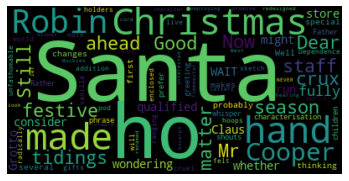

In [82]:
word_cloud =  WordCloud().generate(email_body)
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')#pt a elimina axele
plt.show()

In [83]:
example_corpus = nltk.corpus.gutenberg.words('melville-moby_dick.txt')
len(example_corpus)

260819

In [84]:
type(example_corpus)

nltk.corpus.reader.util.StreamBackedCorpusView

In [85]:
word_list = [''.join(word) for word in example_corpus]
novel_as_string = ' '.join(word_list)

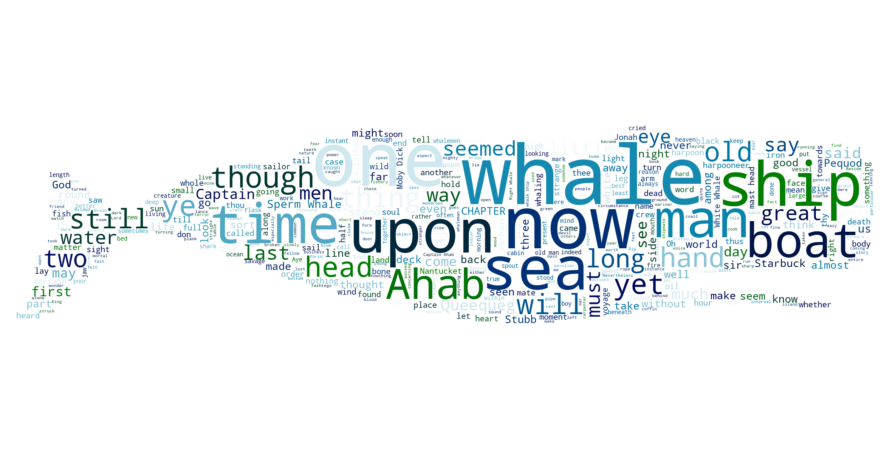

In [86]:
icone = Image.open(WHALE_FILE)
image_mask = Image.new(mode='RGB', size= icone.size, color=(255, 255, 255))
image_mask.paste(icone, box=icone)

rgb_array = np.array(image_mask) # converteste imaginea intr-un array

word_cloud =  WordCloud(mask=rgb_array, background_color='white', 
                        max_words=400, colormap='ocean')
word_cloud.generate(novel_as_string)

plt.figure(figsize=(16, 8))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')#pt a elimina axele
plt.show()

In [87]:
rgb_array.shape

(1024, 2048, 3)

In [88]:
rgb_array[1023,2047]

array([255, 255, 255], dtype=uint8)

In [89]:
rgb_array[500,1000]

array([0, 0, 0], dtype=uint8)

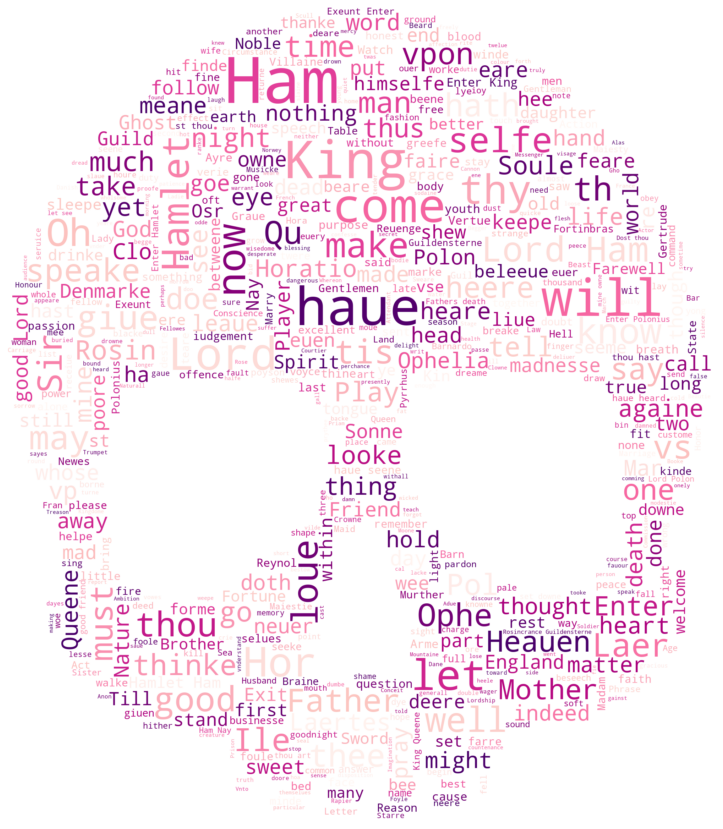

In [90]:
#Challenge: Utilizati imaginea cu cranu din lectia cu resurse  pentru a crea un word cloud pentru shakespeare's play Hamlet 

Hamlet_corpus = nltk.corpus.gutenberg.words('shakespeare-hamlet.txt')


Hamlet_word_list = [''.join(word) for word in Hamlet_corpus]
Hamlet_as_string = ' '.join(Hamlet_word_list)



icone = Image.open(SKULL_FILE)
image_mask = Image.new(mode='RGB', size= icone.size, color=(255, 255, 255))
image_mask.paste(icone, box=icone)

rgb_array = np.array(image_mask) # converteste imaginea intr-un array

word_cloud =  WordCloud(mask=rgb_array, background_color='white', 
                        max_words=600, colormap='RdPu')
word_cloud.generate(Hamlet_as_string)

plt.figure(figsize=(26, 15))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')#pt a elimina axele
plt.show()

# World Cloud of Ham si Spam Messages

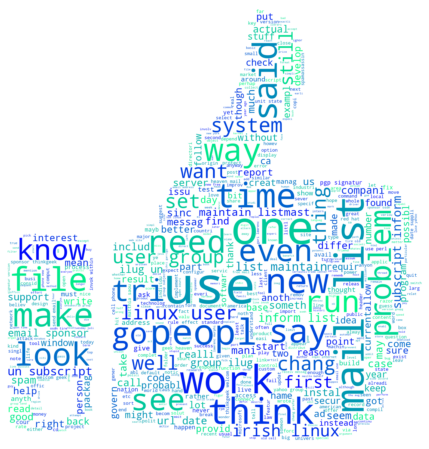

In [91]:
icone = Image.open(THUMBS_UP_FILE)
image_mask = Image.new(mode='RGB', size= icone.size, color=(255, 255, 255))
image_mask.paste(icone, box=icone)

rgb_array = np.array(image_mask) # converteste imaginea intr-un array

#generați textul ca un string pentru world cloud
ham_str = ' '.join(flat_list_ham)


word_cloud =  WordCloud(mask=rgb_array, background_color='white', 
                        max_words=600, colormap='winter')
word_cloud.generate(ham_str)

plt.figure(figsize=(16, 8))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')#pt a elimina axele
plt.show()

In [92]:
# pentru a gasi foduri o sursa free ar fi Google Fonts
# pentru mask si icone porti incerca Font Awesome

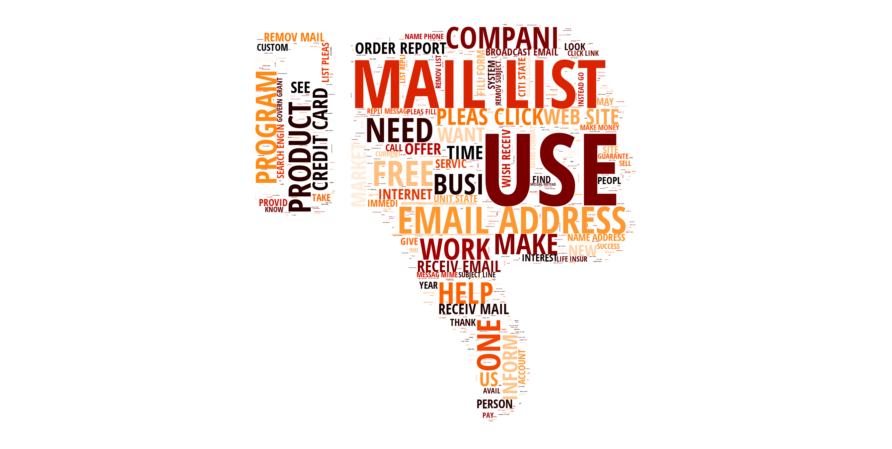

In [93]:
# Challenge: Uită-te la documentația de world cloud. Utilizați fontul personalizat inclus în resursele lecției în loc de fontul implicit și creați un world cloud din cuvintele spammy

icone = Image.open(THUMBS_DOWN_FILE)
image_mask = Image.new(mode='RGB', size= icone.size, color=(255, 255, 255))
image_mask.paste(icone, box=icone)

rgb_array = np.array(image_mask) # converteste imaginea intr-un array

#generați textul ca un string pentru world cloud
spam_str = ' '.join(flat_list_spam)
upper_spam_str = spam_str.upper()

word_cloud =  WordCloud(mask=rgb_array, background_color='white', 
                        max_words=600, colormap='gist_heat', 
                        font_path=CUSTOM_FONT_FILE, max_font_size=300)

word_cloud.generate(upper_spam_str)

plt.figure(figsize=(16, 8))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')#pt a elimina axele
plt.show()

# Generare Vocabular si Dictionar

In [94]:
stemmed_nested_list = data.MESSAGE.apply(clean_msg_no_html)# aici sunt stocate toate bady emailuri
flat_stemmed_list = [item for sublist in stemmed_nested_list for item in sublist]

In [95]:
#optinere unor cuvinte unice, asa vom optine vocabularul
unique_words = pd.Series(flat_stemmed_list).value_counts()
print('Nr of unique words',  unique_words.shape[0])
unique_words.head()


Nr of unique words 27305


http     10662
use       5017
list      4852
email     4370
get       4187
dtype: int64

In [96]:
# Challemge: Creați un subset al seriei numite „frecvent__words” care conține doar cele mai comune 2500 de cuvinte din total. Tipăriți primele 10 cuvinte
frecvent__words = unique_words[0:VOCAB_SIZE] # VOCAB_SIZE =2500
print("Most common words: \n",  frecvent__words[:10])


Most common words: 
 http     10662
use       5017
list      4852
email     4370
get       4187
mail      3985
one       3905
free      3171
time      3090
work      2880
dtype: int64


In [97]:
type(frecvent__words)

pandas.core.series.Series

## Creare vocabular DataFrame cu WORD_ID

In [98]:
word_ids = list(range(0, VOCAB_SIZE))
vocab = pd.DataFrame({'VOCAB_WORD': frecvent__words.index.values}, index = word_ids)
vocab.index.name = 'WORD_ID'# redenumeste coloana cu ID
vocab.head()

,VOCAB_WORD
WORD_ID,
0,http
1,use
2,list
3,email
4,get


## Salveaza Vocabularul ca CSV File

In [99]:
vocab.to_csv(WORD_ID_FILE,index_label=vocab.index.name, header=vocab.VOCAB_WORD.name)

# Exerciti: Verifica daca cuvintele sunt parte a vocabularului

In [100]:
#Challenge: Scrieți o linie de cod care verifică dacă un anumit cuvânt face parte din vocabular. Codul dvs. ar trebui să se întoarcă Adevărat dacă cuvântul se numără printre cele 2500 de cuvinte care cuprind vocabularul, iar Fals altfel. Verifică aceste cuvinte:
#'machine' 'learning' 'fun' 'learn' 'data' 'science' 'app' 'brewery'

#metoda propusa de autor ineficienta
any(vocab.VOCAB_WORD == 'machine')

# Metoda mea ineficienta
# n = input()

# for i in vocab.VOCAB_WORD:
#     if i == n:
#         print("True")
#     else:
#         print('False')
# medoda simplificat 
# vocab.VOCAB_WORD == n

False

In [101]:
'machine' in set(vocab.VOCAB_WORD) #metoda mai buna

False

# Exercitiul 2 : Gaseste Emailul cu cele mai mare numar de cuvinte

In [102]:
# Challenge: Tipăriți numărul de cuvinte pe cel mai lung e-mail (după curățare și stemming). Notă cea mai lungă poziție de e-mail din lista de e-mailuri curățate(). Tipăriți lista cuvinte din cea mai lungă adresă de e-mail. Tipăriți cel mai lung e-mail din cadrul de date

#Hint: foloseste functia len() si practica list comprehension 

In [103]:
#for loop
clean_email_lengths = []
for sublist in stemmed_nested_list:
    clean_email_lengths.append(len(sublist))

In [104]:
clean_email_lengths = [len(sublist) for sublist in stemmed_nested_list]
print('Nr words in the longest email: ', max(clean_email_lengths))
print("Email position in the list (and the dataframe): ", np.argmax(clean_email_lengths))

Nr words in the longest email:  7671
Email position in the list (and the dataframe):  5775


In [105]:
#daca vrei sa vezi cuvintele din acest email lung
stemmed_nested_list[ np.argmax(clean_email_lengths)]

['yahoo',
 'group',
 'sponsor',
 'dvd',
 'free',
 'p',
 'join',
 'http',
 'new',
 'version',
 'unison',
 'avail',
 'test',
 'incorpor',
 'sever',
 'small',
 'improv',
 'main',
 'chang',
 'fix',
 'bug',
 'potenti',
 'seriou',
 'safeti',
 'consequ',
 'small',
 'number',
 'user',
 'habit',
 'run',
 'one',
 'instanc',
 'unison',
 'time',
 'parallel',
 'user',
 'strongli',
 'encourag',
 'upgrad',
 'other',
 'wait',
 'wish',
 'releas',
 'includ',
 'execut',
 'linux',
 'solari',
 'window',
 'look',
 'maintain',
 'moment',
 'none',
 'activ',
 'develop',
 'regularli',
 'use',
 'unison',
 'window',
 'machin',
 'configur',
 'properli',
 'build',
 'execut',
 'export',
 'grab',
 'http',
 'enjoy',
 'benjamin',
 'chang',
 'sinc',
 'ad',
 'prefer',
 'maxthread',
 'use',
 'limit',
 'number',
 'simultan',
 'file',
 'transfer',
 'ad',
 'backupdir',
 'prefer',
 'control',
 'backup',
 'file',
 'store',
 'basic',
 'support',
 'ad',
 'osx',
 'particular',
 'unison',
 'recogn',
 'one',
 'host',
 'synchron',
 

In [106]:
# daca vrea sa vad emailul original din dataframe
data.at[np.argmax(clean_email_lengths), 'MESSAGE']

s set to true,\n\n            the smallest changed files are displayed first. (The default\n\n            setting is false.)\n\n          + A new preference -sortnewfirst causes newly created files to\n\n            be listed before other updates in the user interface.\n\n          + We now allow the ssh protocol to specify a port.\n\n          + Incompatible change: The unison: protocol is deprecated, and\n\n            we added file: and socket:. You may have to modify your\n\n            profiles in the .unison directory. If a replica is specified\n\n            without an explicit protocol, we now assume it refers to a\n\n            file. (Previously "//saul/foo" meant to use SSH to connect to\n\n            saul, then access the foo directory. Now it means to access\n\n            saul via a remote file mechanism such as samba; the old\n\n            effect is now achieved by writing ssh://saul/foo.)\n\n          + Changed the startup sequence for the case where roots are\n\n    

# Gerarare features si Sparse Matrix
## Creare DataFrame cu un cuvant per Coloana

In [107]:
type(stemmed_nested_list[2])

list

In [108]:
type(stemmed_nested_list.tolist())# convet catre o lista

list

In [109]:
word_columns_df = pd.DataFrame.from_records(stemmed_nested_list.tolist())
word_columns_df.head()

,0,1,2,3,4,5,6,7,8,9,...,7661,7662,7663,7664,7665,7666,7667,7668,7669,7670
0,save,life,insur,spend,life,quot,save,g,famili,financi,...,None,None,None,None,None,None,None,None,None,None
1,fight,risk,cancer,http,slim,guarante,lose,lb,day,http,...,None,None,None,None,None,None,None,None,None,None
2,fight,risk,cancer,http,slim,guarante,lose,lb,day,http,...,None,None,None,None,None,None,None,None,None,None
3,adult,club,offer,free,membership,instant,access,site,user,name,...,None,None,None,None,None,None,None,None,None,None
4,thought,might,like,slim,guarante,lose,lb,day,http,fight,...,None,None,None,None,None,None,None,None,None,None


In [110]:
word_columns_df.shape

(5796, 7671)

### Impartirea data in Training and Testing Dataset



In [111]:
# Challenge: Puteți împărți datele în Set de instruire și testare? Setați dimensiunea testului la 30%. Datele de instruire ar trebui să includă 4057 de e-mailuri. Utilizați o valoare semințiară de 42 de modificare a datelor. Care ar trebui să fie valorile țintă?

In [112]:
x_train, x_test, y_train, y_test = train_test_split(word_columns_df, data.CATEGORY, 
                                                     test_size=0.3, random_state=42)

In [113]:
print('Nr of training samples', x_train.shape[0] )
print('Fraction of training set', x_train.shape[0] / word_columns_df.shape[0])

Nr of training samples 4057
Fraction of training set 0.6999654934437544


In [114]:
x_train.index.name = x_test.index.name ='DOC_ID'
x_train.head()

,0,1,2,3,4,5,6,7,8,9,...,7661,7662,7663,7664,7665,7666,7667,7668,7669,7670
DOC_ID,,,,,,,,,,,,,,,,,,,,,
4844,ye,inde,agent,directori,verita,cd,unix,subdirectori,file,call,...,None,None,None,None,None,None,None,None,None,None
4727,problem,come,tri,instal,harddissssk,like,alreadi,mount,http,yahoo,...,None,None,None,None,None,None,None,None,None,None
5022,origin,messag,date,mon,aug,chad,norwood,sven,cc,subject,...,None,None,None,None,None,None,None,None,None,None
3504,inlin,folk,sever,major,internet,outag,morn,across,major,provid,...,None,None,None,None,None,None,None,None,None,None
3921,url,http,date,bath,chronicl,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [115]:
y_train.head()

DOC_ID
4844    0
4727    0
5022    0
3504    0
3921    0
Name: CATEGORY, dtype: int64

# Create a Sparse Matrix for the Training Data

In [116]:
word_index = pd.Index(vocab.VOCAB_WORD)
type(word_index[3])

str

In [117]:
word_index.get_loc('thu')

396

In [118]:
def make_sparse_matrix(df, indexed_words, labels):
    """
    Retunrns sparse matrix as dataframe.
    df: A dataframe with words in columns with a document id as an index( x_train or x_test)
    indexed_words : index of words ordered by word_id
    labels: category as  a series (y_train or y_test)

    x_train.index[0] #pozitia in df
    y_train.at[4844] # label/categoria de care apatine in email(non-spam(0) sau spam(1))
    word_index.get_loc['jul'] # pentru a optine word_ID( first stemmed would(THQ))
    """

    nr_rows = df.shape[0]
    nr_cols = df.shape[1]
    word_set = set(indexed_words)
    dict_list = []
    
    for i in range(nr_rows): #outer loop
        for j in range(nr_cols): #inner loop

            word = df.iat[i, j]          # pentru a pune mana pe un anumit cuvant
            if word in word_set:         #verificam daca acel cuvant este in word_set
                doc_id = df.index[i]     #Daca este atunci ar trebui sa adugam: doc_id
                word_id = indexed_words.get_loc(word) #Word_id
                category = labels.at[doc_id]          #si categoria
                
                #cream un dictionar pentru al le pune pe toate  intr-o structura de date
                item = {'LABEL' : category, 'DOC_ID': doc_id,
                        'OCCURENCE' : 1, 'WORD_ID': word_id}
                
                #acum le append carte o lista
                dict_list.append(item)

    return pd.DataFrame(dict_list)




In [119]:
sparse_train_df = make_sparse_matrix(x_train, word_index, y_train)

In [120]:
sparse_train_df[:5]

,LABEL,DOC_ID,OCCURENCE,WORD_ID
0,0,4844,1,265
1,0,4844,1,1268
2,0,4844,1,507
3,0,4844,1,310
4,0,4844,1,255


In [121]:
sparse_train_df.shape

(430993, 4)

In [122]:
sparse_train_df[-5:]

,LABEL,DOC_ID,OCCURENCE,WORD_ID
430988,1,860,1,47
430989,1,860,1,1438
430990,1,860,1,26
430991,1,860,1,19
430992,1,860,1,126


# Combinati evenimentele cu Metoda Pandas groupby()

In [123]:
train_grouped = sparse_train_df.groupby(['DOC_ID', 'WORD_ID', 'LABEL']).sum()
train_grouped.head()

OCCURENCE
DOC_ID WORD_ID LABEL           
0      2       1              1
       3       1              2
       4       1              1
       7       1              3
       11      1              1

In [124]:
vocab.at[0, 'VOCAB_WORD']

'http'

In [125]:
data.MESSAGE[0]

'<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.0 Transitional//EN">\n\n<HTML><HEAD>\n\n<META content=3D"text/html; charset=3Dwindows-1252" http-equiv=3DContent-T=\n\nype>\n\n<META content=3D"MSHTML 5.00.2314.1000" name=3DGENERATOR></HEAD>\n\n<BODY><!-- Inserted by Calypso -->\n\n<TABLE border=3D0 cellPadding=3D0 cellSpacing=3D2 id=3D_CalyPrintHeader_ r=\n\nules=3Dnone \n\nstyle=3D"COLOR: black; DISPLAY: none" width=3D"100%">\n\n  <TBODY>\n\n  <TR>\n\n    <TD colSpan=3D3>\n\n      <HR color=3Dblack noShade SIZE=3D1>\n\n    </TD></TR></TD></TR>\n\n  <TR>\n\n    <TD colSpan=3D3>\n\n      <HR color=3Dblack noShade SIZE=3D1>\n\n    </TD></TR></TBODY></TABLE><!-- End Calypso --><!-- Inserted by Calypso=\n\n --><FONT \n\ncolor=3D#000000 face=3DVERDANA,ARIAL,HELVETICA size=3D-2><BR></FONT></TD><=\n\n/TR></TABLE><!-- End Calypso --><FONT color=3D#ff0000 \n\nface=3D"Copperplate Gothic Bold" size=3D5 PTSIZE=3D"10">\n\n<CENTER>Save up to 70% on Life Insurance.</CENTER></FONT><FONT color=3D#ff=\n\n0000

In [126]:
train_grouped = train_grouped.reset_index()
train_grouped.head()

,DOC_ID,WORD_ID,LABEL,OCCURENCE
0,0,2,1,1
1,0,3,1,2
2,0,4,1,1
3,0,7,1,3
4,0,11,1,1


In [127]:
train_grouped.tail()

,DOC_ID,WORD_ID,LABEL,OCCURENCE
258323,5795,2047,0,2
258324,5795,2053,0,1
258325,5795,2299,0,1
258326,5795,2373,0,1
258327,5795,2442,0,1


In [130]:
vocab.at[2047, 'VOCAB_WORD']


'cancel'

In [131]:
data.MESSAGE[5795]


"Hi there,\n\n\n\nNow this is probably of no use to you whatsoever, but...\n\n\n\nNot a deb-head, but I also have a problem regards NVidia. I've two machines,\n\npretty much the same hardware. \n\nathlon 1700XP's, both have NVidia cards, one Gforce3 Ti and a Gforce2MX,\n\nboth use the same driver module. \n\n\n\nBoth have same kernel version albeit it compiled for their particular\n\nhardware.\n\n\n\nOne works perfectly, the other fails to load. When I check with lsmod, I can\n\nsee the NVdriver is loaded, but not used ;--(\n\nThus when I startx, it bombs out. \n\n\n\nIU still have X with the default nv driver and crappy accelleration -->\n\n650fps with glxgears [should be over 2000fps]\n\nIts not a hardware issue with the cards as I swapped them over and get the\n\nsame symptoms. \n\n\n\nI reckon my mobo is cack, I've tried swapping slots around, reserving\n\nresources etc all to no avail. \n\nShould there be an interrupt for the nv card? I haven't checked the other\n\nbox yet.\n\n\n\

In [133]:
train_grouped.shape

(258328, 4)

## Savare Training Data ca .txt File

In [135]:
np.savetxt(TRAINING_DATA_FILE, train_grouped, fmt='%d')

In [ ]:
train_grouped.columns

# Challenge
Puteți crea o matrice sparse pentru datele de testare. Grupați aparițiile aceluiași cuvânt în același e-mail. Apoi, salvați datele ca fișier .txt

In [138]:
sparse_test_df = make_sparse_matrix(x_test, word_index, y_test)

In [139]:
#Combinati evenimentele cu Metoda Pandas groupby()
test_grouped = sparse_test_df.groupby(['DOC_ID', 'WORD_ID', 'LABEL']).sum()
test_grouped = test_grouped.reset_index()
test_grouped.head()

,DOC_ID,WORD_ID,LABEL,OCCURENCE
0,8,2,1,1
1,8,3,1,4
2,8,4,1,2
3,8,5,1,1
4,8,6,1,2


In [140]:
# Savare Training Data ca .txt File
np.savetxt(TEST_DATA_FILE, test_grouped, fmt='%d')

# Pre-Processing Subtleties and Checking your Undeestanding

# Challenge
Am început cu 5796 de e-mailuri. Am împărțit-o în 4057 de e-mailuri pentru instruire și 1739 e-mailuri pentru testare.

Câte e-mailuri individuale au fost incluse în fișierul .txt de testare? Numărați numărul din dataFrame test_grupat. După împărțirea și modificarea datelor, câte e-mailuri au fost incluse în x_test DataFrame? Numărul este același? Dacă nu, ce e-mailuri au fost excluse și de ce? Comparați valorile de DOC_ID pentru a afla.

In [143]:
train_doc_ids = set(train_grouped.DOC_ID)
test_doc_ids = set(test_grouped.DOC_ID)

In [144]:
len(test_doc_ids)

1724

In [145]:
len(x_test)

1739

In [147]:
set(x_test.index.values) - test_doc_ids

{134, 179, 240, 274, 298, 339, 439, 471, 670, 734, 765, 945, 1544, 1670, 1700}

In [151]:
data.MESSAGE[134]

'------=_NextPart_000_00E8_85C13B1D.B7243B86\n\nContent-Type: text/html; charset="iso-8859-1"\n\nContent-Transfer-Encoding: base64\n\n\n\n\n\nPGh0bWw+DQoNCjxib2R5IGJnY29sb3I9IiNGRkZGRkYiIHRleHQ9IiMwMDAw\n\nMDAiPiANCjxwIGFsaWduPSJjZW50ZXIiPjxhIGhyZWY9Imh0dHA6Ly93d3cu\n\nZGlyZWN0d2Vic3RvcmUuY29tL3RveXMvaW5kZXguaHRtbCI+PGltZyBzcmM9\n\nImh0dHA6Ly93d3cuZGlyZWN0d2Vic3RvcmUuY29tL21waWMuanBnIiB3aWR0\n\naD0iNTAwIiBoZWlnaHQ9IjMzOSIgYm9yZGVyPSIwIj48L2E+PGJyPiANCjxm\n\nb250IHNpemU9IjMiIGZhY2U9IkFyaWFsLCBIZWx2ZXRpY2EsIHNhbnMtc2Vy\n\naWYiPjxhIGhyZWY9Imh0dHA6Ly93d3cuZGlyZWN0d2Vic3RvcmUuY29tL3Rv\n\neXMvaW5kZXguaHRtbCI+PGI+RU5URVIgDQpOT1cgaWYgeW91IGFyZSAxOCBh\n\nbmQgb3ZlcjwvYj48L2E+PC9mb250PjwvcD4gDQo8cCBhbGlnbj0iY2VudGVy\n\nIj48Zm9udCBmYWNlPSJBcmlhbCwgSGVsdmV0aWNhLCBzYW5zLXNlcmlmIiBz\n\naXplPSI0IiBjb2xvcj0iI0ZGMDAwMCI+PGI+U1BFQ0lBTCANCk9GRkVSPGJy\n\nPiANCjxmb250IHNpemU9IjUiPjMwIERheXMgPGk+RlJFRSBhY2Nlc3M8L2k+\n\nIDwvZm9udD48YnI+IA0KdG8gdGhlIGxhcmdlc3QgQWR1bHRzaXRlIG9uIHRo\n\nZSB3ZWIuPGJyPiANCjwvYj4gPG

In [152]:
data.loc[134]

MESSAGE      ------=_NextPart_000_00E8_85C13B1D.B7243B86\n\...
CATEGORY                                                     1
FILE_NAME               00135.00e388e3b23df6278a8845047ca25160
Name: 134, dtype: object

In [153]:
clean_msg_no_html(data.at[134, 'MESSAGE'])# rezultatul la 134 este [] pentru ca sunt inlaturate toate HTML-urile

[]